✅ Batch Report Loaded Successfully!
             timestamp                           file  \
0  2025-10-11T17:12:07  attention_is_all_you_need.pdf   
1  2025-10-11T17:24:45  attention_is_all_you_need.pdf   
2  2025-10-13T21:06:24              another_paper.pdf   
3  2025-10-13T21:06:36  attention_is_all_you_need.pdf   
4  2025-10-13T21:18:27              another_paper.pdf   

                                 query_used  \
0  Summarize contributions and limitations.   
1  Summarize contributions and limitations.   
2       What problem does this paper solve?   
3       What problem does this paper solve?   
4       What problem does this paper solve?   

                                        summary_path  \
0  results/summaries/attention_is_all_you_need_su...   
1  results/summaries/attention_is_all_you_need_su...   
2         results/summaries/another_paper_summary.md   
3  results/summaries/attention_is_all_you_need_su...   
4         results/summaries/another_paper_summary.md   

 

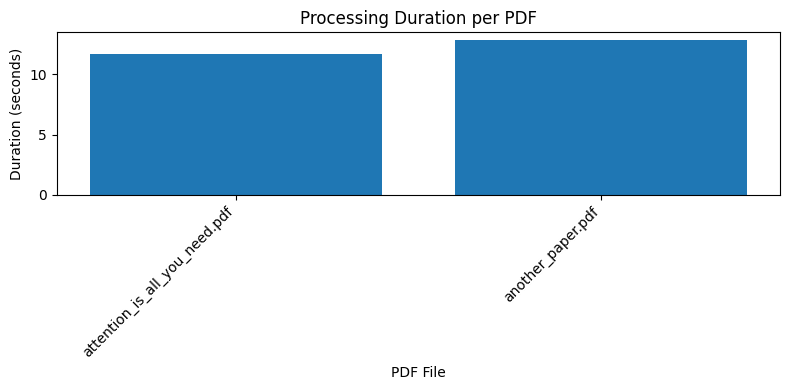


📊 Summary Insights:
Total PDFs processed: 5
Average runtime: 9.78 seconds
Fastest run: 6.54 seconds
Slowest run: 12.81 seconds


In [1]:
# visual_dashboard.ipynb  (or visual_dashboard.py)

# -------------------------------------------------------
# ResearchGPT Assistant - Visual Summary Dashboard
# -------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- 1️⃣ Load batch report ---
report_path = Path("../results/batch_report.csv")
df = pd.read_csv(report_path)

print("✅ Batch Report Loaded Successfully!")
print(df.head())

# --- 2️⃣ Clean up column names ---
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# --- 3️⃣ Plot runtimes per PDF ---
plt.figure(figsize=(8,4))
plt.bar(df["file"], df["duration_sec"])
plt.title("Processing Duration per PDF")
plt.xlabel("PDF File")
plt.ylabel("Duration (seconds)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# --- 4️⃣ Plot word counts if available ---
if "summary_word_count" in df.columns and "analysis_word_count" in df.columns:
    plt.figure(figsize=(8,4))
    plt.bar(df["file"], df["summary_word_count"], label="Summary")
    plt.bar(df["file"], df["analysis_word_count"], label="Analysis", alpha=0.7)
    plt.title("Summary vs. Analysis Word Counts")
    plt.xlabel("PDF File")
    plt.ylabel("Word Count")
    plt.legend()
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# --- 5️⃣ Print quick stats ---
print("\n📊 Summary Insights:")
print(f"Total PDFs processed: {len(df)}")
if "duration_sec" in df.columns:
    print(f"Average runtime: {df['duration_sec'].mean():.2f} seconds")
    print(f"Fastest run: {df['duration_sec'].min():.2f} seconds")
    print(f"Slowest run: {df['duration_sec'].max():.2f} seconds")
